# Numpy

**Autor:** Luis Miguel de la Cruz Salas

<a href="https://github.com/luiggix/Python_cero_a_experto">Python de cero a experto</a> by Luis M. de la Cruz Salas is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

**Objetivo general**
- Conocer y aplicar los conocimientos sobre la biblioteca *Numpy*.

**Objetivos particulares**
- Describir un problema que puede resolverse usando *Numpy*.
- Mostrar el uso de los elementos más importantes de la biblioteca *Numpy*. 
- Sentar las bases para extender lo aprendido a distintos proyectos.

## Contenido
- [1 - Conducción de Calor.](#1)
    - [Ejemplo 1 - Conducción de Calor.](#ej-1)
    - [Ejercicio 1.](#ejer-1)
- [2 - Flujo de Calor.](#2)
    - [Ejemplo 2 - Flujo de Calor.](#ej-2)
    - [Ejercicio 2.](#ejer-2)
- [3 - Seguimiento de Partículas.](#3)
    - [Ejemplo 3 - Seguimiento de Partículas.](#ej-3)
    - [Ejercicio 3.](#ejer-3)
    - [Ejercicio 4.](#ejer-4)
    - [Ejercicio 5.](#ejer-5)

<a name='1'></a>
## Conducción de calor

**Jean-Baptiste Joseph Fourier**
fue un matemático y físico francés que ejerció una fuerte influencia en la ciencia a través de su trabajo *Théorie analytique de la chaleur*. En este trabajo mostró que es posible analizar la conducción de calor en cuerpos sólidos en términos de series matemáticas infinitas, las cuales ahora llevan su nombre: *Series de Fourier*. Fourier comenzó su trabajo en 1807, en Grenoble, y lo completó en París en 1822. Su trabajo le permitió expresar la conducción de calor en objetos bidimensionales (hojas muy delgadas de algún material) en términos de una ecuación diferencial:


$$
\dfrac{\partial u}{ \partial t} = \kappa \left(\dfrac{\partial^2 u}{ \partial x^2} + \dfrac{\partial^2 u}{ \partial y^2}\right)
$$

donde $u$ representa la temperatura en un instante de tiempo $t$ y en un punto $(x,y)$ del plano Cartesiano y $\kappa$ es la conductividad del material.

La solución a la ecuación anterior se puede aproximar usando el método de diferencias y una fórmula explícita de dicha solución es la siguiente:

$$
u_{i,j}^{n+1} = u_{i,j}^n + \dfrac{h_t\kappa}{h^2} 
\left(u_{i+1,j}^n + u_{i-1,j}^n + u_{i,j+1}^n + u_{i,j-1}^n - 4u_{i,j}^n\right) 
$$

donde:
- $u_{i,j} = u(x_i, y_j), u_{i+1,j} = u(x_{i+1}, y_j), u_{i-1,j} = u(x_{i-1}, y_j), u_{i,j+1} = u(x_i, y_{j+1}), u_{i,j-1} = u(x_i, y_{j-1})$. 
- El superíndice indica el instante de tiempo, entonces el instante actual es $n = t$ y el instante siguiente es $n+1 = t + h_t$, con $h_t$ el paso de tiempo.
- En este ejemplo $h_x = h_y$.

Usando esta aproximación, vamos a realizar una ejemplo de conducción de calor, pero para ello necesitamos conocer las herramientas de <a href="./T14_Numpy.ipynb">numpy</a> y de <a href="./T15_Matplotlib.ipynb">matplotlib</a>.

<a name='ej-1'></a>
### Ejemplo 1.
<div>
 <img src="./utils/figs/malla2D_DF.png"  hspace="5" vspace="5" style="float: right;"/>
Calculemos la transferencia de calor por conducción en una placa cuadrada unitaria usando el método de diferencias finitas. El problema se describe de la siguiente manera:
$$
\dfrac{\partial u}{ \partial t} = \kappa \left(\dfrac{\partial^2 u}{ \partial x^2} + \dfrac{\partial^2 u}{ \partial y^2}\right)
$$
$$
\begin{eqnarray}
\hline
u(x,y,t=0) & = & 0 \qquad \text{Condición inicial}\\
\hline
u(0,y,t) & = & 20 \qquad \text{Condiciones}\\
u(1,y,t) & = & 5 \qquad \qquad \text{de}\\
u(x,0,t) & = & 50 \qquad \text{frontera}\\
u(x,1,t) & = & 8 \\
\hline
\end{eqnarray}
$$ 
 </div>

**<font color="#126534">SOLUCIÓN.</font>**<br>

Los pasos a seguir son los siguientes.

**1. Definir los parámetros físicos y numéricos del problema:**

In [25]:
import numpy as np

In [26]:
# Parámetros físicos
k = 1.0  # Conductividad
Lx = 1.0  # Longitud del dominio en dirección x
Ly = 1.0  # Longitud del dominio en dirección y

# Parámetros numéricos
Nx = 9 # Número de incógnitas en dirección x
Ny = 9 # Número de incógnitas en dirección y
h = Lx / (Nx+1) # Espaciamiento entre los puntos de la rejilla
ht = 0.0001     # Paso de tiempo
N = (Nx + 2)* (Ny + 2) # Número total de puntos en la rejilla

**2. Definir la rejilla donde se hará el cálculo (malla):**

In [27]:
x = np.linspace(0,Lx,Nx+2) # Arreglo con las coordenadas en x
y = np.linspace(0,Ly,Ny+2) # Arreglo con las coordenadas en y
print(x)
print(y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [28]:
xg, yg = np.meshgrid(x,y) # Creamos la rejilla para usarla en Matplotlib
print(xg)
print(yg)

[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]]
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
 [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [1.  1.  1.

In [29]:
import matplotlib.pyplot as plt

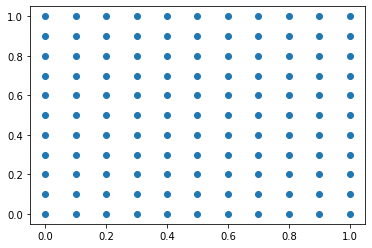

In [30]:
plt.scatter(xg, yg) # Graficamos la rejilla

**3. Definir las condiciones iniciales y de frontera:**
$$
\begin{eqnarray}
\hline
u(x,y,t=0) & = & 0 \qquad \text{Condición inicial}\\
\hline
u(0,y,t) & = & 20 \qquad \text{Condiciones}\\
u(1,y,t) & = & 5 \qquad \qquad \text{de}\\
u(x,0,t) & = & 50 \qquad \text{frontera}\\
u(x,1,t) & = & 8 \\
\hline
\end{eqnarray}
$$

In [31]:
u = np.zeros((Nx+2, Ny+2))
#u = np.zeros(N).reshape(Nx+2, Ny+2) # Arreglo para almacenar la aproximación
print(u)
u[0,:]    = 20  # Pared izquierda    
u[Nx+1,:] = 5   # Pared derecha
u[:,0]    = 50  # Pared inferior
u[:,Ny+1] = 8   # Pared superior  
print(u) 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[50. 20. 20. 20. 20. 20. 20. 20. 20. 20.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.]
 [50.  5.  5.  5.  5.  5.  5.  5.  5.  5.  8.]]


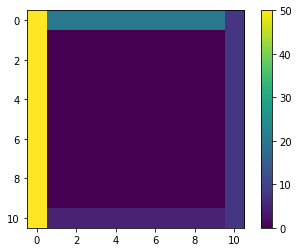

In [32]:
f = plt.imshow(u)
plt.colorbar(f)

**4. Implementar el algoritmo de solución:**
$$
u_{i,j}^{n+1} = u_{i,j}^n + \dfrac{h_t \kappa}{h^2} 
\left(u_{i+1,j}^n + u_{i-1,j}^n + u_{i,j+1}^n + u_{i,j-1}^n - 4u_{i,j}^n\right) 
$$


[17.2629661414254, 13.602554907075358, 11.121464292079526, 9.370340343338656, 8.089431314598079, 7.121431307338295, 6.3681582882854775, 5.7667100290256075, 5.275727580531656, 4.867291496014421, 4.522054027452314, 4.226261372943586, 3.9698959855402296, 3.745493517737013, 3.547373613271126, 3.3711295389631717, 3.21328287724892, 3.071045452376749, 2.9421521475712167, 2.824741357872151, 2.7172679513259683, 2.6184387521297463, 2.5271638648303663, 2.4425193146763595, 2.363717902820954, 2.290086125094306, 2.2210456430727876, 2.1560982312045556, 2.094813422134956, 2.0368182790286324, 1.9817888683696612, 1.9294431092766993, 1.8795347490871392, 1.8318482687809046, 1.7861945617665091, 1.7424072597326865, 1.700339602469993, 1.6598617667041742, 1.620858583384764, 1.5832275844672883, 1.5468773296753073, 1.5117259715044917, 1.4777000231834065, 1.4447332996949114, 1.4127660064863383, 1.381743954309308, 1.3516178818527333, 1.322342870562428, 1.293877838356635, 1.2661851009139355, 1.239229990882043, 1.2

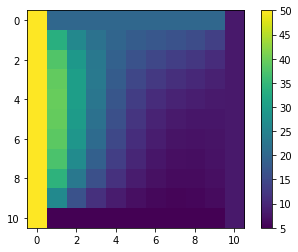

In [33]:
ht = 0.001
r = k * ht / h**2
u_new = u.copy()
tolerancia = 9.0e-1 #1.0e-3
error = 1.0
error_lista = []
while(error > tolerancia):
    for i in range(1,Nx+1):
        for j in range(1,Ny+1):
            u_new[i,j] = u[i,j] + r * (u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] - 4*u[i,j])
    error = np.linalg.norm(u_new - u)
    error_lista.append(error)
#    print(error)
    u[:] = u_new[:]

print(error_lista)

f = plt.imshow(u)
plt.colorbar(f)

<a name='ejer-1'></a>
### Ejercicio 1.
#### **<font color="DodgerBlue">Realiza los siguiente gráficos de la solución anterior:</font>**

1. Contornos llenos (`contourf`) y líneas de contorno negras sobrepuestas (`contour`).
2. Almacena el error en cada iteración y grafícalo en semi-log.
3. Realiza las dos gráficas anteriores en un solo renglón.

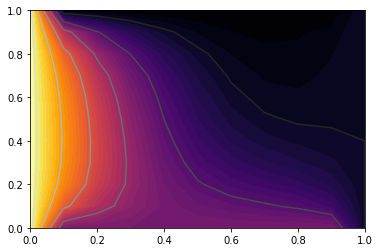

In [34]:
plt.contour(xg, yg, u, cmap='gray', levels=5)
plt.contourf(xg, yg, u, levels=50, cmap='inferno')

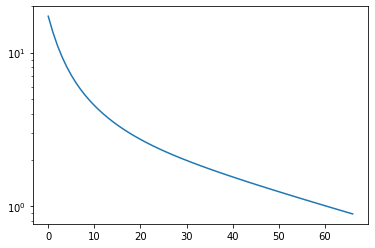

In [35]:
plt.plot(error_lista)
plt.yscale('log')

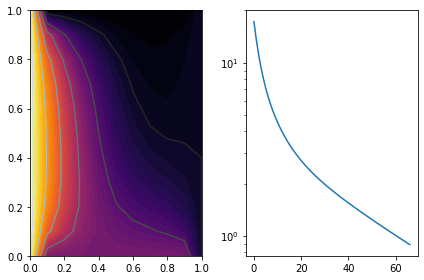

In [36]:
fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
plt.contour(xg, yg, u, cmap='gray', levels=5)
plt.contourf(xg, yg, u, levels=50, cmap='inferno')

ax = fig.add_subplot(1, 2, 2)
plt.plot(error_lista)
plt.yscale('log')

plt.tight_layout()

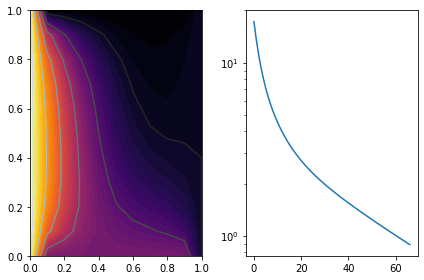

In [37]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.contour(xg, yg, u, cmap='gray', levels=5)
ax1.contourf(xg, yg, u, levels=50, cmap='inferno')

ax2.plot(error_lista)
ax2.set_yscale('log')

plt.tight_layout()

<a name='2'></a>
## Flujo de calor

Fourier también estableció una ley para el flujo de calor que se escribe como:

$$
\vec{q} = -\kappa \nabla u = -\kappa \left(\dfrac{\partial u}{\partial x}, \dfrac{\partial u}{\partial y}\right)
$$

<a name='ej-2'></a>
### Ejemplo 2.
Usando la información calculada de la temperatura (almacenada en el arreglo `u`), vamos a calcular el flujo de calor usando la siguiente fórmula en diferencias:

$$
\vec{q}_{i,j} = (qx_{i,j}, qy_{i,j}) = -\dfrac{\kappa}{2h} (u_{i+1,j}-u_{i-1,j}, u_{i,j+1}-u_{i,j-1} )
$$

**<font color="#126534">SOLUCIÓN.</font>**<br>

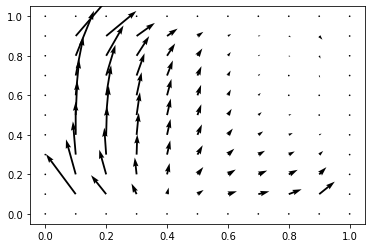

In [38]:
#qx = np.zeros(N).reshape(Nx+2, Ny+2)
qx = np.zeros((Nx+2, Ny+2))
qy = qx.copy()

s = k / 2*h
for i in range(1,Nx+1):
    for j in range(1,Ny+1):
        qx[i,j] = -s * (u[i+1,j] - u[i-1,j])
        qy[i,j] = -s * (u[i,j+1] - u[i,j-1])

plt.quiver(xg, yg, qx, qy, scale=10, zorder=10)

<a name='ejer-2'></a>
### Ejercicio 2.
#### **<font color="DodgerBlue">Grafica el campo vectorial del flujo de calor, junto con los contornos de la temperatura (`contourf` y `contour`). Haz que tu gráfica se vea con razón de aspecto correcta de 1 por 1.</font>**

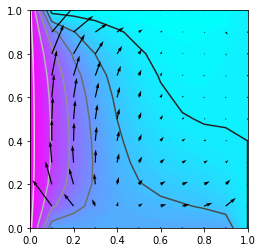

In [40]:
plt.contour(xg, yg, u, cmap='gray', levels=5)
plt.contourf(xg, yg, u, levels=50, cmap='cool', zorder=1)
plt.quiver(xg, yg, qx, qy, scale=10, zorder=10)
ax = plt.gca()
ax.set_aspect('equal')

<a name='1'></a>
## Seguimiento de partículas

<div>
 <img src="./utils/figs/Vectorial.png"  hspace="5" vspace="5" style="float: right;"/>
Si soltamos una partícula en un flujo, dicha partícula seguirá la dirección del flujo y delineará  una trayectoria como se muestra en la siguiente figura. Para calcular los puntos de la trayectoria debemos resolver una ecuación como la siguiente:
    
$$
\dfrac{\partial \vec{x}}{ \partial t} = \vec{v} \qquad \text{con} \qquad \vec{x}(t=0) = \vec{x}_o 
$$
    
donde $\vec{x} = (x,y) $ representa la posición de la partícula y $\vec{v} = (vx, vy)$ su velocidad.
El método más sencillo para encontrar las posiciones de la partícula es conocido como de *Euler hacia adelante* y se escribe como:
    
$$
\vec{x}_i^{n+1} = \vec{x}_i^{n} + h_t * \vec{v}_{i}^n
$$
    
donde $\vec{x}_i^{n}$ representa la posición de la partícula $i$ en el instante $n$, $h_t$ es el paso de tiempo y $\vec{v}_i$ es la velocidad en la partícula $i$ en el instante $n$.
 </div>


<a name='ej-3'></a>
## Ejemplo 3.
Calcular y graficar las trayectorias de varias partículas usando el campo vectorial generado por el flujo de calor del ejemplo 2.

**<font color="#126534">SOLUCIÓN.</font>**<br>

Escribimos la fórmula de *Euler hacia adelante* en componentes como sigue:

$$
\begin{eqnarray}
x_i^{n+1} & = & x_i^{n} + h_t * vx_{i}^n \\
y_i^{n+1} & = & y_i^{n} + h_t * vy_{i}^n 
\end{eqnarray}
$$

**1. Definimos un punto inicial de forma aleatoria en el cuadrado unitario:**

In [65]:
xo = np.random.rand(5)
yo = np.random.rand(5)
print(xo)
print(yo)

[0.22088622 0.71332448 0.30826151 0.03326098 0.40055634]
[0.76595131 0.78505067 0.9231862  0.36647302 0.90997966]


**2. Definimos arreglos para almacenar las coordenadas de la trayectoria:**

In [66]:
Pasos = 10
xp = np.zeros(Pasos)
yp = np.zeros(Pasos)
xp[0] = xo
yp[0] = yo
print(xp)
print(yp)

ValueError: setting an array element with a sequence.

(0.0, 1.0)

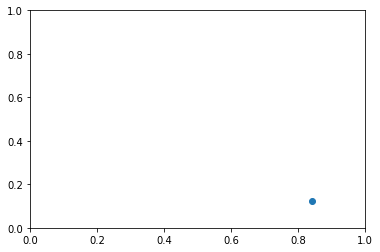

In [59]:
plt.plot(xp[0], yp[0], 'o-')
plt.xlim(0,1)
plt.ylim(0,1)

**3. Implementamos el método de Euler hacia adelante**:

In [60]:
# Interpolación de la velocidad
def interpolaVel(qx, qy, xpi, ypi, h):
    # localizamos la partícula dentro de la rejilla:
    li = int(xpi/h)
    lj = int(ypi/h)
    return (qx[li,lj], qy[li,lj])

In [61]:
ht = 0.1
for n in range(1,Pasos):
    vx, vy = interpolaVel(qx, qy, xp[n-1], yp[n-1], h)
    xp[n] = xp[n-1] + ht * vx
    yp[n] = yp[n-1] + ht * vy

In [62]:
print(xp)
print(yp)

[0.8410396  0.89560864 0.94743403 1.00204947 1.00204947 1.00204947
 1.00204947 1.00204947 1.00204947 1.00204947]
[0.12448416 0.25909232 0.34973297 0.38885063 0.38885063 0.38885063
 0.38885063 0.38885063 0.38885063 0.38885063]


(0.0, 1.0)

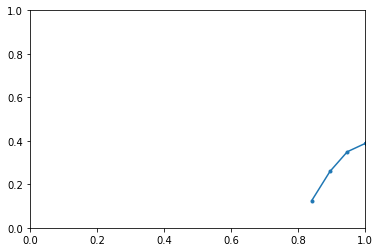

In [64]:
plt.plot(xp, yp, '.-')
plt.xlim(0,1)
plt.ylim(0,1)

<a name='ejer-3'></a>
### Ejercicio 3.
#### **<font color="DodgerBlue">Dibuja la trayectoria de la siguiente manera.</font>**

- El primer punto color naranja transparente y contorno negro. 
- Las posiciones siguientes de color negro sobre puestas sobre la trayectoria.
- La trayectoria de color gris.
- Verifica que la trayectoria no se salga del cuadrado unitario.

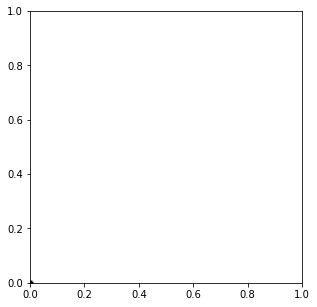

In [53]:
plt.figure(figsize=(5,5))
plt.scatter(xp[0], yp[0], c='orange', edgecolor='k', alpha=0.5)
plt.plot(xp, yp, c='gray')
plt.scatter(xp[1:], yp[1:], c='k', s=10, zorder=5)
plt.xlim(0,1)
plt.ylim(0,1)
ax = plt.gca()
ax.set_aspect('equal')
plt.savefig('trayectoria1.pdf')

<a name='ejer-4'></a>
### Ejercicio 4.
#### **<font color="DodgerBlue">Dibuja varias trayectorias que inicien en sitios diferentes.</font>**

<a name='ejer-5'></a>
### Ejercicio 5.
#### **<font color="DodgerBlue">Implementa una interpolación bilineal para calcular la velocidad.</font>**

---
### Proyecto 1.
Resolver numéricamente las ecuaciones de Lorenz y dibujar las trayectorias en el espacio fase $x − y − z$ para $N$ posiciones iniciales elegidas aletoriamente.
$$
\dfrac{dx}{dt} = \sigma(y − x),\qquad
\dfrac{dy}{dt} = x(\rho − z) − y,\qquad
\dfrac{dz}{dt} = xy − \beta z
$$
para $\sigma = 10$, $\beta = 8/3$, $\rho = 28$.
---
### Proyecto 2.
Resolver el siguiente IVP para un conjunto de inicial de partı́culas.

$$
\dfrac{d \vec{x}}{dt} = \vec{u}(t, \vec{x})
$$

donde $\vec{x} = (x, y)$ y $\vec{u} = (u, v)$, por lo tanto:

$$
\dfrac{d x}{dt} = u(t, \vec{x}), \qquad \dfrac{d y}{dt} = v(t, \vec{x}),
$$

Para $(x, y) \in [0, 1] \times [0, 1]$ y una velocidad definida como sigue:

$$
\begin{eqnarray}
u & = & -A \cos(\alpha \pi y) sin(\alpha \pi x) \\
v & = & A \sin(\alpha \pi y) cos(\alpha \pi x)
\end{eqnarray}
$$

---
**Tip**:<br>
<div style="color: #2233AA;">
En ambos proyectos usar el método de Euler hacia adelante para resolver las ecuaciones:

Dado:
$$
\begin{eqnarray}
\dfrac{d y(t)}{dt} & = & f(t, y) \qquad \text{para} \qquad a < t < b\\
y(t=a) & = & y_o
\end{eqnarray}
$$

El método de Euler hacia adelante es:

$$
y_{n+1} = y_{n} + h_t * f(t,y_{n}), \qquad \text{para} \, n = 0, 1, 2, \dots, N_t-1
$$

donde 
$$
\begin{eqnarray}
h_t & = & (b-a)/N_t \\
y_{n} & = & y(t = a + n*h_t) \\
y_{n+1} & = & y(t = a + (n+1)*h_t)
\end{eqnarray}
$$
</div>